# Apply Artificial Neural Network and Recurrent Neural Network  for Sentence Sentiment analysis classic=fication whether the sentiment is positive or negative 

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':'1TQByB47MV12zdUHTNNgpyGxsxiEMTr9K'}) # replace the id with id of file you want to access
downloaded.GetContentFile('data.csv')

# Import data from drive

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('data.csv')
df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [ ]:
df.iloc[1000,0]

'Ahlstrom Corporation Seppo Parvi , CFO Distribution : Main media www.ahlstrom.com Ahlstrom in brief Ahlstrom is a global leader in the development , manufacture and marketing of high performance nonwovens and specialty papers .'

In [ ]:
df.iloc[1001,1]

'neutral'

In [ ]:
==

# finding the maximum numbers in the sentence

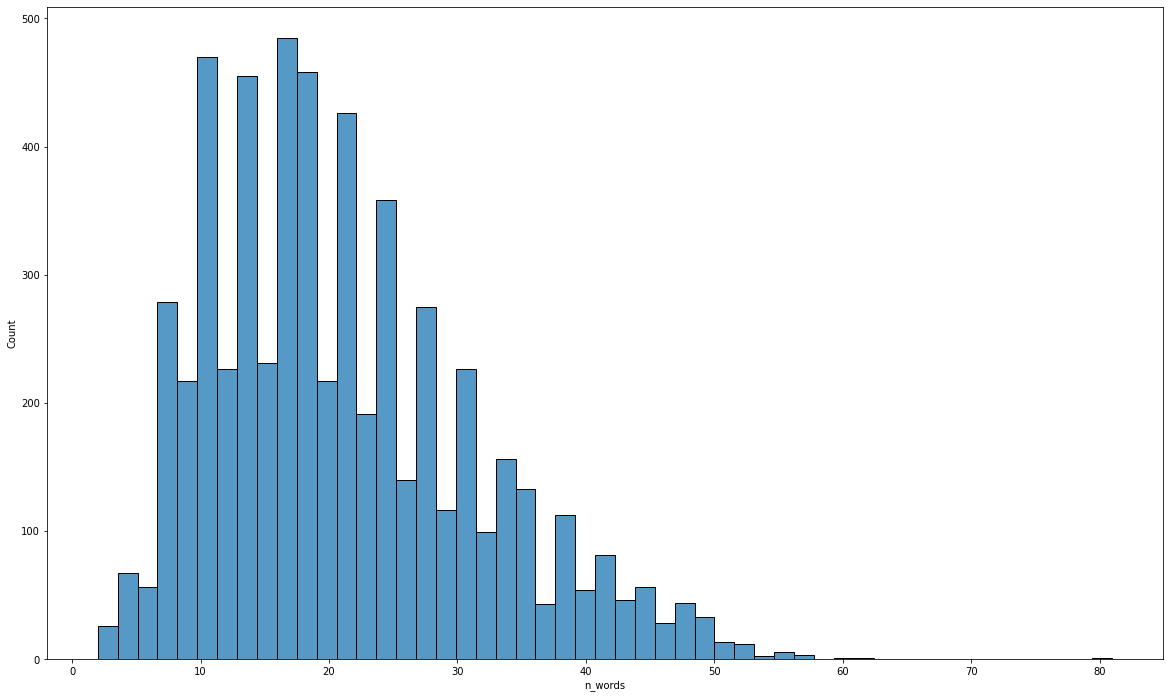

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(20, 12))
# finding ideal length to use for further process
df['n_words'] = df['Sentence'].apply(lambda x:len(x.split()))
sns.histplot(data = df, x='n_words')
plt.show()

In [ ]:
df.head()

,Sentence,Sentiment,n_words
0,The GeoSolutions technology will leverage Bene...,positive,32
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,11
2,"For the last quarter of 2010 , Componenta 's n...",positive,39
3,According to the Finnish-Russian Chamber of Co...,neutral,20
4,The Swedish buyout firm has sold its remaining...,neutral,23


# Drop Non required columns from the dataset

In [ ]:
data_3.drop(columns=['n_words','Sentiment'],inplace=True)

# Import Tokenizer from Keras

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

# now we will tokenize the words to sequence so that our model can understand
# we will also pad the sentences with less than 40 words to make size of each sentence equal
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data_3['Sentence'].values)
sequences = tokenizer.texts_to_sequences(data_3['Sentence'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
X = pad_sequences(sequences, maxlen=max_len, padding='post')

Found 11543 unique tokens.


# Divide data into target variable and Predictor variable

In [ ]:
y=data_3[['negative','neutral','positive']]
y.shape

(5842, 3)

# divide test dataset and train dataset

In [ ]:
from sklearn.model_selection import train_test_split

# splitting the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)
X_train.shape,X_test.shape

((5783, 40), (59, 40))

# Import model from keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, SpatialDropout1D, Embedding, LSTM
model = Sequential()

# Building a Neural network model
- add Embedding layer
- Drop out layer to take care of Overfitting
- add LSTM layer to take care of sequence of text
- add activation function softmax for classification

In [ ]:
n_most_words = 500
n_dim = 50
model.add(Embedding(n_most_words,n_dim,input_length = X_train.shape[1]))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50,dropout=0.25,recurrent_dropout=0.25))
model.add(Dense(25,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 50)            1154600   
                                                                 
 spatial_dropout1d (SpatialD  (None, 40, 50)           0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 3)                 78        
                                                                 
Total params: 1,176,153
Trainable params: 1,176,153
Non-trainable params: 0
______________________________________________

# Import callbacks for early stopping 
# Fit the model to training data for text classification

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint('weights.hdf5', monitor='val_loss', save_best_only=True)
early_stop = EarlyStopping(patience=5)
model_history = model.fit(X_train,y_train,epochs=30,validation_split = 0.1, batch_size = 128 ,callbacks=[checkpoint,early_stop])

Epoch 1/30
41/41 [==============================] - 10s 116ms/step - loss: 0.9982 - acc: 0.5411 - val_loss: 1.0346 - val_acc: 0.4836
Epoch 2/30
41/41 [==============================] - 4s 102ms/step - loss: 0.9736 - acc: 0.5419 - val_loss: 1.0217 - val_acc: 0.4836
Epoch 3/30
41/41 [==============================] - 6s 155ms/step - loss: 0.8861 - acc: 0.5886 - val_loss: 0.8875 - val_acc: 0.5889
Epoch 4/30
41/41 [==============================] - 4s 107ms/step - loss: 0.7475 - acc: 0.6829 - val_loss: 0.9268 - val_acc: 0.6131
Epoch 5/30
41/41 [==============================] - 8s 194ms/step - loss: 0.6182 - acc: 0.7560 - val_loss: 0.8497 - val_acc: 0.6149
Epoch 6/30
41/41 [==============================] - 8s 188ms/step - loss: 0.5201 - acc: 0.7927 - val_loss: 0.9125 - val_acc: 0.6356
Epoch 7/30
41/41 [==============================] - 6s 149ms/step - loss: 0.4146 - acc: 0.8201 - val_loss: 1.0492 - val_acc: 0.6511
Epoch 8/30
41/41 [==============================] - 4s 101ms/step - loss: 0

In [ ]:
acc = model_history.history['acc']
val_acc = model_history.history['val_acc']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

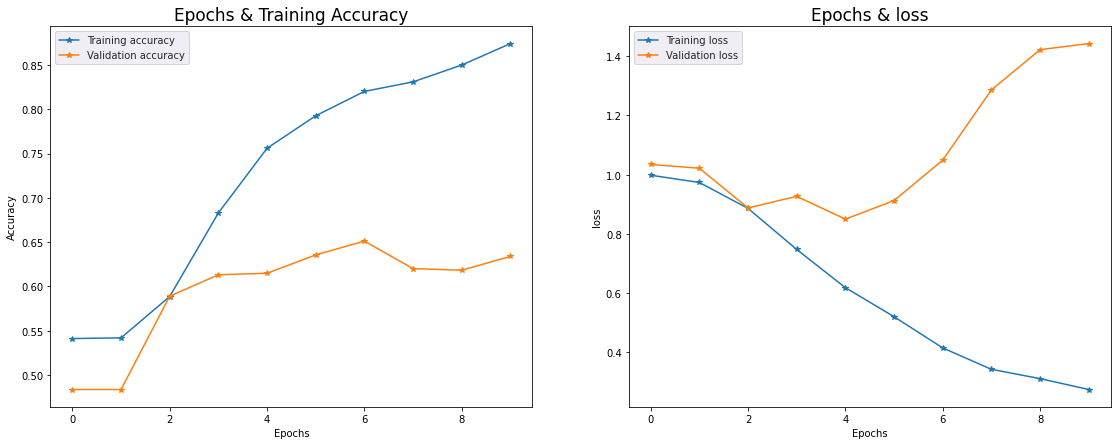

In [ ]:
ig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (19,7))
sns.set_style("darkgrid")

ax[0].plot(acc, '*-',label = 'Training accuracy')
ax[0].plot(val_acc, '*-',label = 'Validation accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Epochs & Training Accuracy', fontsize = 17)
ax[0].legend(loc='best')


ax[1].plot(loss, '*-',label = 'Training loss')
ax[1].plot(val_loss, '*-',label = 'Validation loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('loss')
ax[1].set_title('Epochs & loss', fontsize = 17)
ax[1].legend(loc='best')
sns.set_style("darkgrid")

# plotting train accuracy and Validation Accuracy WRT Epochs